In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    cohen_kappa_score,
    classification_report
)

import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_ind, levene
from statsmodels.stats.multitest import multipletests
import pandas as pd

import pandas as pd
from scipy.stats import ttest_ind, levene
from statsmodels.stats.multitest import multipletests

from scipy.stats import ttest_ind, levene
from statsmodels.stats.multitest import multipletests
import pandas as pd

from scipy.stats import ttest_ind, levene
from statsmodels.stats.multitest import multipletests
import pandas as pd

import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, levene
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import math



# Import

In [4]:
df_llm = pd.read_csv('../datasets/llm_logodds.csv')
df_bert = pd.read_csv('../datasets/recipes_with_logodds_lists.csv')
df_hum = pd.read_csv('../datasets/human_labelling.csv')

In [5]:
bert=pd.read_csv('../datasets/llm_bert_clusters.csv')

In [6]:
df_human=bert.merge(df_hum[['title','HumanLabelling']],on='title',how='inner')
df_human.rename(columns={'HumanLabelling':'human_labelling'},inplace=True)

In [7]:
df_llm.head(2)

,Unnamed: 0.1,Unnamed: 0,title,NER_list,filtered_verbs,dish_type_response,naed,naed_label,hier,hier_label,...,ingredients_logodd,verbs_logodd,title_logodd,prompt_logodd,other_logodd,avg_ingredients_logodd,avg_verbs_logodd,avg_title_logodd,avg_prompt_logodd,avg_other_logodd
0,0,0,""" Bar"" Cheese","['velveeta cheese', 'mayonnaise', 'horseradish...","['pan', 'add', 'stir', 'add', 'stir', 'cool', ...","RATIONALE: cheesy dip, mayonnaise-based, horse...",4,"Salads, Slaws, Dips & Dressings",4,"Salads, Slaws, Dips & Dressings",...,"[np.float64(2.169300619363106), np.float64(1.9...",[],[],[],"[np.float64(6.924665145525124), np.float64(0.8...",1.66002,NaN,NaN,NaN,3.902021
1,1,1,""" Barber's"" Chewy Vanilla & Salted Butter Toffee","['icing sugar', 'milk', 'corn syrup', 'vanilla...","['pot', 'stir', 'reduce', 'remove', 'stir', 'r...","RATIONALE: Desserts, Cookies & Cakes (toffee i...",2,"Desserts, Cookies & Cakes",2,"Desserts, Cookies & Cakes",...,[],[],[np.float64(7.971070044769564)],"[np.float64(5.0457553654246805), np.float64(1....",[],NaN,NaN,7.97107,3.423022,NaN


In [8]:
df_bert.head(2)

,title,ingredients,directions,link,source,NER,NER_list,NER_len,directions_len,title_lower,...,cluster_label,ing_doc,verb_doc,title_words,ingredients_logodds,verbs_logodds,title_logodds,avg_ing_logodds,avg_verb_logodds,avg_title_logodds
0,""" Bar"" Cheese","[""32 ounces Velveeta cheese (regular)"", ""1 1/2...","[""In a large sauce pan over low heat, melt the...",www.food.com/recipe/bar-cheese-42151,Gathered,"[""Velveeta cheese"", ""mayonnaise"", ""horseradish...",['velveeta cheese' 'mayonnaise' 'horseradish' ...,5,368,""" bar"" cheese",...,Salads / Slaws / Dressings,velveeta cheese mayonnaise horseradish tabasco...,add pan cool stir refrigerate,"['bar', 'cheese']","[np.float64(-0.17337157393217753), np.float64(...","[np.float64(0.1390271235041056), np.float64(-0...","[np.float64(0.18229974402825286), np.float64(-...",0.016433,-0.002536,0.049448
1,""" Barber's"" Chewy Vanilla & Salted Butter Toffee","[""2 14 cups icing sugar"", ""12 cup milk"", ""14 c...","[""Butter a loaf pan."", ""In a pot,combine icing...",www.food.com/recipe/barbers-chewy-vanilla-salt...,Recipes1M,"[""icing sugar"", ""milk"", ""corn syrup"", ""vanilla...",['icing sugar' 'milk' 'corn syrup' 'vanilla be...,5,557,""" barber's"" chewy vanilla & salted butter toffee",...,Desserts / Cookies / Cakes,icing sugar milk corn syrup vanilla bean butter,reach remove pour cut pot reduce stir,"['barber', 's', 'chewy', 'vanilla', 'salted', ...","[np.float64(0.26824734181490173), np.float64(-...","[np.float64(-0.09018553338804705), np.float64(...","[np.float64(15.63682043352), np.float64(0.1886...",0.025405,0.008975,3.521157


In [9]:
df_human.head(2)

,Unnamed: 0,title,NER_list,filtered_verbs,umap_x,umap_y,dish_type_response,naed,naed_label,hier,hier_label,human_labelling
0,36,"""Crazy"" Chocolate Pie",['flour' 'sugar' 'cocoa' 'oil' 'vinegar' 'vani...,['make' 'put' 'beat' 'bake'],-3.217442,0.533128,"RATIONALE: chocolate pie, dessert, sweet, bake...",2,"Desserts, Cookies & Cakes",1,"Breakfast Bakes, Breads & Pancakes",2
1,55,"""Frying Pan"" Fudge",['margarine' 'milk' 'semi-sweet chocolate chip...,['set' 'bring' 'reduce' 'stir' 'remove' 'stir'...,-1.273401,2.896526,"RATIONALE: sweet treat, chocolate, fudge, cook...",2,"Desserts, Cookies & Cakes",2,"Desserts, Cookies & Cakes",2


In [10]:
label_names = {
    1: "Breakfast Bakes, Breads & Pancakes",
    2: "Desserts, Cookies & Cakes",
    3: "Drinks, Punches & Fruit Treats",
    4: "Salads, Slaws, Dips & Dressings",
    5: "Pasta & Vegetable Casseroles/Bakes",
    6: "Soups, Stews & One-Pots",
    7: "Meat & Fish Mains",
}

In [11]:
df_human['human_label'] = df_human['human_labelling'].map(label_names)

df_human[['title','human_labelling','human_label','hier_label']].head()

,title,human_labelling,human_label,hier_label
0,"""Crazy"" Chocolate Pie",2,"Desserts, Cookies & Cakes","Breakfast Bakes, Breads & Pancakes"
1,"""Frying Pan"" Fudge",2,"Desserts, Cookies & Cakes","Desserts, Cookies & Cakes"
2,"""Kota Riganato"" - Baked Chicken Oregano",7,Meat & Fish Mains,"Salads, Slaws, Dips & Dressings"
3,"""My Own"" Chile",6,"Soups, Stews & One-Pots","Soups, Stews & One-Pots"
4,"""Philly"" Cherry Pie",2,"Desserts, Cookies & Cakes","Desserts, Cookies & Cakes"


# Comparison human-bert

## prediction analysis

In [12]:
df_bert_human = df_human.merge(df_bert[['title', 'ingredients_logodds', 'verbs_logodds',	'title_logodds',	'avg_ing_logodds',	'avg_verb_logodds', 'avg_title_logodds']],on='title',how='inner')
print(df_bert_human.shape)
df_bert_human.head(2)

(1000, 19)


,Unnamed: 0,title,NER_list,filtered_verbs,umap_x,umap_y,dish_type_response,naed,naed_label,hier,hier_label,human_labelling,human_label,ingredients_logodds,verbs_logodds,title_logodds,avg_ing_logodds,avg_verb_logodds,avg_title_logodds
0,36,"""Crazy"" Chocolate Pie",['flour' 'sugar' 'cocoa' 'oil' 'vinegar' 'vani...,['make' 'put' 'beat' 'bake'],-3.217442,0.533128,"RATIONALE: chocolate pie, dessert, sweet, bake...",2,"Desserts, Cookies & Cakes",1,"Breakfast Bakes, Breads & Pancakes",2,"Desserts, Cookies & Cakes","[np.float64(0.00487650140997953), np.float64(0...","[np.float64(-0.06303453370200453), np.float64(...","[np.float64(1.062364411199455), np.float64(1.0...",0.056274,0.086935,0.758551
1,55,"""Frying Pan"" Fudge",['margarine' 'milk' 'semi-sweet chocolate chip...,['set' 'bring' 'reduce' 'stir' 'remove' 'stir'...,-1.273401,2.896526,"RATIONALE: sweet treat, chocolate, fudge, cook...",2,"Desserts, Cookies & Cakes",2,"Desserts, Cookies & Cakes",2,"Desserts, Cookies & Cakes","[np.float64(0.26824734181490173), np.float64(-...","[np.float64(-0.09018553338804705), np.float64(...","[np.float64(0.21187176312164646), np.float64(-...",0.015693,0.008547,0.937253


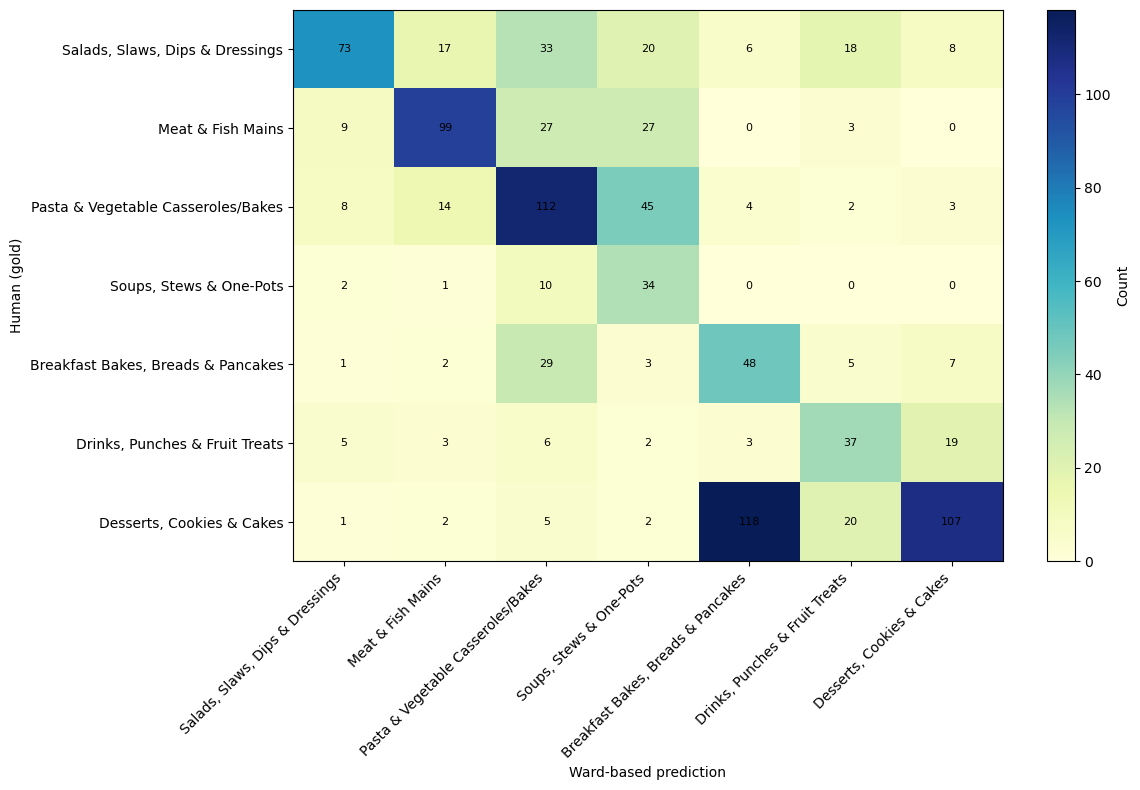

In [13]:
os.makedirs('images', exist_ok=True)

df_cmp = df_bert_human[['human_label', 'hier_label']].dropna()
labels = [
    "Salads, Slaws, Dips & Dressings",
    "Meat & Fish Mains",
    "Pasta & Vegetable Casseroles/Bakes",
    "Soups, Stews & One-Pots",
    "Breakfast Bakes, Breads & Pancakes",
    "Drinks, Punches & Fruit Treats",
    "Desserts, Cookies & Cakes",
]

cm = confusion_matrix(
    df_cmp['human_label'],    
    df_cmp['hier_label'],     
    labels=labels
)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap='YlGnBu', aspect='auto')

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

ax.set_xlabel("Ward-based prediction")
ax.set_ylabel("Human (gold)")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Count")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="black", fontsize=8)

plt.tight_layout()

# 10) Save to images/
fig.savefig('../images/confusion_matrix.png', dpi=300)

plt.show()

In [14]:
y_true = df_cmp['human_label']
y_pred = df_cmp['hier_label']

accuracy = accuracy_score(y_true, y_pred)
kappa    = cohen_kappa_score(y_true, y_pred)

print(f"Overall accuracy: {accuracy:.4f}")
print(f"Cohen's κ:        {kappa:.4f}\n")

report = classification_report(
    y_true, y_pred,
    labels=labels,
    output_dict=True,
    zero_division=0
)
report_df = pd.DataFrame(report).T.loc[labels + ['accuracy','macro avg','weighted avg']]
report_df = report_df.rename(columns={'f1-score':'f1_score'})

print("Per‐label metrics:\n")
print(report_df[['precision','recall','f1_score','support']])

Overall accuracy: 0.5100
Cohen's κ:        0.4248

Per‐label metrics:

                                    precision    recall  f1_score  support
Salads, Slaws, Dips & Dressings      0.737374  0.417143  0.532847   175.00
Meat & Fish Mains                    0.717391  0.600000  0.653465   165.00
Pasta & Vegetable Casseroles/Bakes   0.504505  0.595745  0.546341   188.00
Soups, Stews & One-Pots              0.255639  0.723404  0.377778    47.00
Breakfast Bakes, Breads & Pancakes   0.268156  0.505263  0.350365    95.00
Drinks, Punches & Fruit Treats       0.435294  0.493333  0.462500    75.00
Desserts, Cookies & Cakes            0.743056  0.419608  0.536341   255.00
accuracy                             0.510000  0.510000  0.510000     0.51
macro avg                            0.523059  0.536357  0.494234  1000.00
weighted avg                         0.601873  0.510000  0.526277  1000.00


## Inference analysis

In [15]:
clusters = list(range(1,8))
metrics = ['avg_ing_logodds','avg_verb_logodds','avg_title_logodds']

In [16]:
results = []
for k in clusters:
    sub = df_bert_human[df_bert_human['human_labelling']==k]
    correct = sub[sub['hier']==k]
    wrong   = sub[sub['hier']!=k]
    for m in metrics:
        tstat, pval = ttest_ind(correct[m], wrong[m], equal_var=False, nan_policy='omit')
        mean_diff = correct[m].mean() - wrong[m].mean()
        results.append({
            'cluster': k,
            'metric': m,
            'mean_correct': correct[m].mean(),
            'mean_wrong'  : wrong[m].mean(),
            'mean_diff'   : mean_diff,
            't_stat'      : tstat,
            'p_val'       : pval
        })

res_df = pd.DataFrame(results)

In [17]:
# 2) Adjust p-values for the 7×3=21 tests (Benjamini–Hochberg FDR)
res_df['p_adj'] = multipletests(res_df['p_val'], method='fdr_bh')[1]

In [18]:
# 3) Compute an overall test across *all* recipes
overall = []
for m in metrics:
    corr = df_bert_human[df_bert_human['hier']==df_bert_human['human_labelling']][m]
    wrong= df_bert_human[df_bert_human['hier']!=df_bert_human['human_labelling']][m]
    t, p = ttest_ind(corr, wrong, equal_var=False, nan_policy='omit')
    overall.append({
        'cluster': 'ALL',
        'metric': m,
        'mean_correct': corr.mean(),
        'mean_wrong'  : wrong.mean(),
        'mean_diff'   : corr.mean()-wrong.mean(),
        't_stat'      : t,
        'p_val'       : p
    })
overall_df = pd.DataFrame(overall)
overall_df['p_adj'] = multipletests(overall_df['p_val'], method='fdr_bh')[1]

# 4) Combine cluster‐level and overall results
final = pd.concat([res_df, overall_df], ignore_index=True)
final.to_csv('cluster_vs_human_logodds_tests.csv', index=False)

print(final)

   cluster             metric  mean_correct  mean_wrong  mean_diff    t_stat  \
0        1    avg_ing_logodds      0.036399    0.013168   0.023231  3.299511   
1        1   avg_verb_logodds      0.013024    0.004021   0.009003  1.844135   
2        1  avg_title_logodds      2.163814    2.120246   0.043569  0.081784   
3        2    avg_ing_logodds      0.017669    0.036859  -0.019190 -5.206101   
4        2   avg_verb_logodds      0.006557    0.016356  -0.009799 -2.943670   
5        2  avg_title_logodds      2.664310    2.545503   0.118808  0.344290   
6        3    avg_ing_logodds      0.023873    0.010980   0.012893  1.818839   
7        3   avg_verb_logodds      0.013744    0.007623   0.006121  1.200683   
8        3  avg_title_logodds      3.572198    1.816360   1.755838  2.336647   
9        4    avg_ing_logodds      0.006633    0.010734  -0.004101 -1.103975   
10       4   avg_verb_logodds      0.009915    0.005157   0.004758  1.304939   
11       4  avg_title_logodds      1.566

In [19]:
df = df_bert_human.copy()
df['overall_purity'] = df[[
    'avg_ing_logodds',
    'avg_verb_logodds',
    'avg_title_logodds'
]].mean(axis=1)

rows = []
for k in range(1,8):
    sub = df[df['human_labelling']==k]
    corr = sub[sub['hier']==k]['overall_purity']
    wrong= sub[sub['hier']!=k]['overall_purity']
    # Welch's t-test
    tstat, pval = ttest_ind(corr, wrong, equal_var=False, nan_policy='omit')
    rows.append({
        'cluster':       k,
        'n_corr':        len(corr),
        'n_wrong':       len(wrong),
        'mean_corr':     corr.mean(),
        'mean_wrong':    wrong.mean(),
        'diff':          corr.mean() - wrong.mean(),
        't_stat':        tstat,
        'p_val_raw':     pval
    })

cluster_stats = pd.DataFrame(rows)

# FDR‐correct the 7 p‐values
cluster_stats['p_val_adj'] = multipletests(cluster_stats['p_val_raw'], method='fdr_bh')[1]

print(cluster_stats)

   cluster  n_corr  n_wrong  mean_corr  mean_wrong      diff    t_stat  \
0        1      48       47   0.737746    0.712478  0.025268  0.141918   
1        2     107      148   0.896179    0.866239  0.029939  0.260209   
2        3      37       38   1.203272    0.611654  0.591617  2.358366   
3        4      73      102   0.527790    0.554547 -0.026757 -0.284059   
4        5     112       76   0.635714    0.687115 -0.051400 -0.465364   
5        6      34       13   0.652932    0.676995 -0.024063 -0.082787   
6        7      99       66   0.678792    0.771829 -0.093037 -0.590179   

   p_val_raw  p_val_adj  
0   0.887484   0.935064  
1   0.794944   0.935064  
2   0.021051   0.147356  
3   0.776710   0.935064  
4   0.642397   0.935064  
5   0.935064   0.935064  
6   0.556348   0.935064  


In [20]:
from scipy.stats import ttest_ind, levene
from statsmodels.stats.multitest import multipletests
import pandas as pd

df = df_bert_human.copy()
# 1) compute your aggregate metric
df['overall_purity'] = df[[
    'avg_ing_logodds',
    'avg_verb_logodds',
    'avg_title_logodds'
]].mean(axis=1)

rows = []
for k in range(1, 8):
    sub   = df[df['human_labelling'] == k]
    corr  = sub[sub['hier'] == k]['overall_purity']
    wrong = sub[sub['hier'] != k]['overall_purity']

    # mean‐difference
    tstat, p_mean = ttest_ind(corr, wrong,
                              equal_var=False,
                              nan_policy='omit')
    mean_diff = corr.mean() - wrong.mean()

    # variance‐difference
    wstat, p_var = levene(corr, wrong,
                          center='median',
                          nan_policy='omit')
    var_diff = corr.var(ddof=1) - wrong.var(ddof=1)

    rows.append({
        'cluster'     : k,
        'n_corr'      : len(corr),
        'n_wrong'     : len(wrong),
        'mean_corr'   : corr.mean(),
        'mean_wrong'  : wrong.mean(),
        'mean_diff'   : mean_diff,
        't_stat'      : tstat,
        'p_mean_raw'  : p_mean,
        'var_corr'    : corr.var(ddof=1),
        'var_wrong'   : wrong.var(ddof=1),
        'var_diff'    : var_diff,
        'w_stat'      : wstat,
        'p_var_raw'   : p_var
    })

cluster_stats = pd.DataFrame(rows)

# 2) FDR‐correct both sets of p‐values
cluster_stats['p_mean_adj'] = multipletests(cluster_stats['p_mean_raw'],
                                            method='fdr_bh')[1]
cluster_stats['p_var_adj']  = multipletests(cluster_stats['p_var_raw'],
                                            method='fdr_bh')[1]

print(cluster_stats)


   cluster  n_corr  n_wrong  mean_corr  mean_wrong  mean_diff    t_stat  \
0        1      48       47   0.737746    0.712478   0.025268  0.141918   
1        2     107      148   0.896179    0.866239   0.029939  0.260209   
2        3      37       38   1.203272    0.611654   0.591617  2.358366   
3        4      73      102   0.527790    0.554547  -0.026757 -0.284059   
4        5     112       76   0.635714    0.687115  -0.051400 -0.465364   
5        6      34       13   0.652932    0.676995  -0.024063 -0.082787   
6        7      99       66   0.678792    0.771829  -0.093037 -0.590179   

   p_mean_raw  var_corr  var_wrong  var_diff    w_stat  p_var_raw  p_mean_adj  \
0    0.887484  0.522231   0.978515 -0.456284  0.442936   0.507356    0.935064   
1    0.794944  0.855252   0.776355  0.078898  0.002700   0.958604    0.935064   
2    0.021051  1.234888   1.123086  0.111802  1.275079   0.262513    0.147356   
3    0.776710  0.228689   0.585450 -0.356761  3.326313   0.069905    0.9350

  feature  mean_correct  mean_wrong      diff    t_stat     p_val     p_adj
0    ings      0.014702    0.016048 -0.001346 -0.716494  0.473871  0.710807
1   verbs      0.007867    0.009253 -0.001386 -0.977902  0.328370  0.710807
2  titles      2.183035    2.138733  0.044303  0.275251  0.783183  0.783183


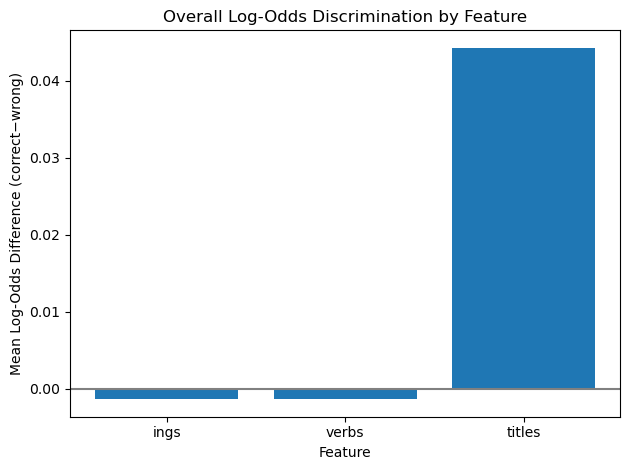

In [21]:
features = [
    'avg_ing_logodds',
    'avg_verb_logodds',
    'avg_title_logodds'
]

# flag correct vs wrong
df = df_bert_human.copy()
df['correct'] = df['hier_label'] == df['human_label']

# collect stats
rows = []
for feat in features:
    corr = df[df['correct']][feat].dropna()
    wrong = df[~df['correct']][feat].dropna()
    tstat, pval = ttest_ind(corr, wrong, equal_var=False)
    rows.append({
        'feature': feat.replace('avg_','').replace('_logodd',''),
        'mean_correct': corr.mean(),
        'mean_wrong':   wrong.mean(),
        'diff':         corr.mean() - wrong.mean(),
        't_stat':       tstat,
        'p_val':        pval
    })

summary = pd.DataFrame(rows)
summary['p_adj'] = multipletests(summary['p_val'], method='fdr_bh')[1]

print(summary)

# bar‐plot of the mean differences
fig, ax = plt.subplots()
ax.bar(summary['feature'], summary['diff'])
ax.axhline(0, color='gray')
for i, r in summary.iterrows():
    sig = ''
    if   r['p_adj'] < 0.001: sig='***'
    elif r['p_adj'] < 0.01:  sig='**'
    elif r['p_adj'] < 0.05:  sig='*'
    ax.text(i, r['diff'] + np.sign(r['diff'])*0.02, sig,
            ha='center', va='bottom' if r['diff']>=0 else 'top')
ax.set_ylabel('Mean Log-Odds Difference (correct−wrong)')
ax.set_xlabel('Feature')
ax.set_title('Overall Log-Odds Discrimination by Feature')
plt.tight_layout()
plt.show()

# Comparison llm - human

In [22]:
df_llm_human = df_human.merge(df_llm[['ingredients_logodd', 'verbs_logodd', 'title_logodd',
       'prompt_logodd', 'other_logodd', 'title', 'avg_ingredients_logodd',	'avg_verbs_logodd',	'avg_title_logodd',	'avg_prompt_logodd','avg_other_logodd']],on='title',how='inner')
print(df_llm_human.shape)
df_llm_human.head(2)

(1000, 23)


,Unnamed: 0,title,NER_list,filtered_verbs,umap_x,umap_y,dish_type_response,naed,naed_label,hier,...,ingredients_logodd,verbs_logodd,title_logodd,prompt_logodd,other_logodd,avg_ingredients_logodd,avg_verbs_logodd,avg_title_logodd,avg_prompt_logodd,avg_other_logodd
0,36,"""Crazy"" Chocolate Pie",['flour' 'sugar' 'cocoa' 'oil' 'vinegar' 'vani...,['make' 'put' 'beat' 'bake'],-3.217442,0.533128,"RATIONALE: chocolate pie, dessert, sweet, bake...",2,"Desserts, Cookies & Cakes",1,...,[],[np.float64(0.27421487845897013)],[np.float64(2.67108362342075)],[np.float64(1.800288530589962)],[np.float64(5.936469937917482)],NaN,0.274215,2.671084,1.800289,5.93647
1,55,"""Frying Pan"" Fudge",['margarine' 'milk' 'semi-sweet chocolate chip...,['set' 'bring' 'reduce' 'stir' 'remove' 'stir'...,-1.273401,2.896526,"RATIONALE: sweet treat, chocolate, fudge, cook...",2,"Desserts, Cookies & Cakes",2,...,[],[],[np.float64(9.726176202823538)],[np.float64(1.800288530589962)],"[np.float64(3.264891198357233), np.float64(2.3...",NaN,NaN,9.726176,1.800289,1.89153


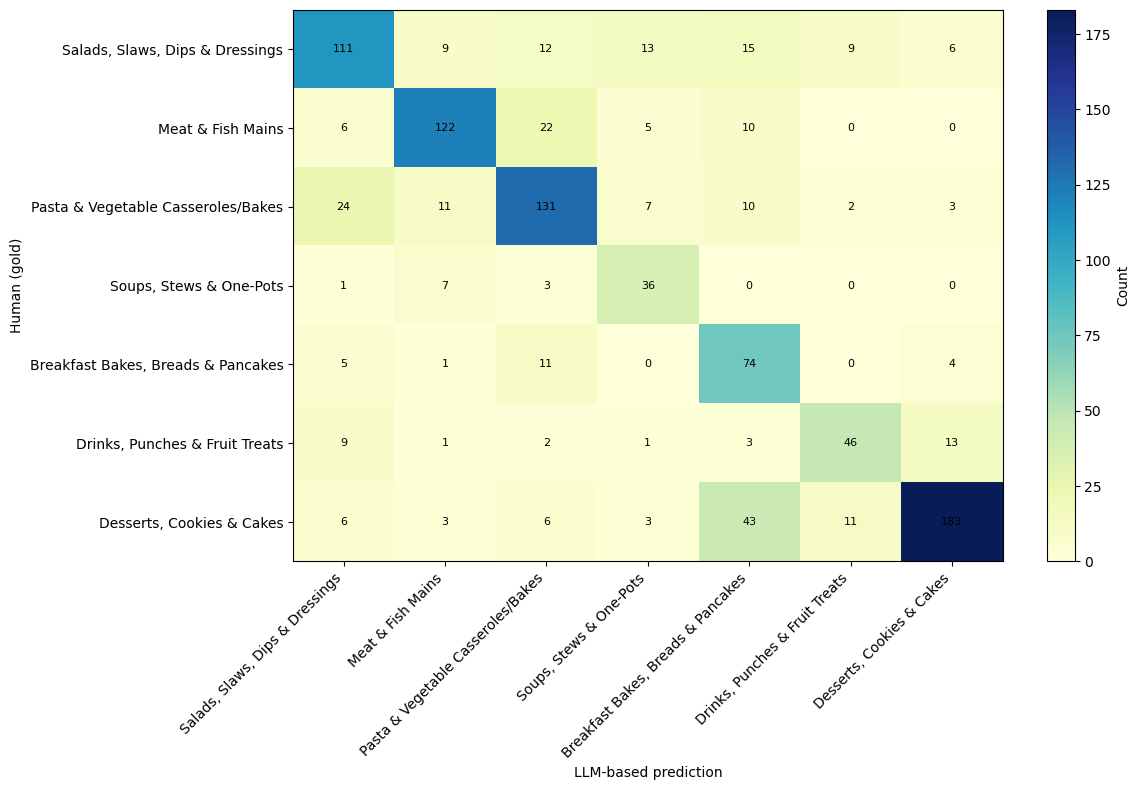

In [23]:
df_cmp = df_llm_human[['human_label', 'naed_label']].dropna()

labels = [
    "Salads, Slaws, Dips & Dressings",
    "Meat & Fish Mains",
    "Pasta & Vegetable Casseroles/Bakes",
    "Soups, Stews & One-Pots",
    "Breakfast Bakes, Breads & Pancakes",
    "Drinks, Punches & Fruit Treats",
    "Desserts, Cookies & Cakes",
]

cm = confusion_matrix(
    df_cmp['human_label'],    
    df_cmp['naed_label'],     
    labels=labels
)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap='YlGnBu', aspect='auto')

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

ax.set_xlabel("LLM-based prediction")
ax.set_ylabel("Human (gold)")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Count")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="black", fontsize=8)

plt.tight_layout()
fig.savefig('../images/confusion_matrix_llm.png', dpi=300)
plt.show()

In [24]:
y_true = df_cmp['human_label']
y_pred = df_cmp['naed_label']

accuracy = accuracy_score(y_true, y_pred)
kappa    = cohen_kappa_score(y_true, y_pred)

print(f"Overall accuracy: {accuracy:.4f}")
print(f"Cohen's κ:        {kappa:.4f}\n")

report = classification_report(
    y_true, y_pred,
    labels=labels,
    output_dict=True,
    zero_division=0
)
report_df = pd.DataFrame(report).T.loc[labels + ['accuracy','macro avg','weighted avg']]
report_df = report_df.rename(columns={'f1-score':'f1_score'})

print("Per‐label metrics:\n")
print(report_df[['precision','recall','f1_score','support']])

Overall accuracy: 0.7030
Cohen's κ:        0.6443

Per‐label metrics:

                                    precision    recall  f1_score   support
Salads, Slaws, Dips & Dressings      0.685185  0.634286  0.658754   175.000
Meat & Fish Mains                    0.792208  0.739394  0.764890   165.000
Pasta & Vegetable Casseroles/Bakes   0.700535  0.696809  0.698667   188.000
Soups, Stews & One-Pots              0.553846  0.765957  0.642857    47.000
Breakfast Bakes, Breads & Pancakes   0.477419  0.778947  0.592000    95.000
Drinks, Punches & Fruit Treats       0.676471  0.613333  0.643357    75.000
Desserts, Cookies & Cakes            0.875598  0.717647  0.788793   255.000
accuracy                             0.703000  0.703000  0.703000     0.703
macro avg                            0.680180  0.706625  0.684188  1000.000
weighted avg                         0.727721  0.703000  0.708686  1000.000


## Inference analysis

In [25]:
clusters = list(range(1,8))
metrics = ['avg_ingredients_logodd',	'avg_verbs_logodd',	'avg_title_logodd',	'avg_prompt_logodd','avg_other_logodd']

In [26]:
results = []
for k in clusters:
    sub = df_llm_human[df_llm_human['human_labelling']==k]
    correct = sub[sub['naed']==k]
    wrong   = sub[sub['naed']!=k]
    for m in metrics:
        # two‐sample Welch’s t-test
        tstat, pval = ttest_ind(correct[m], wrong[m], equal_var=False, nan_policy='omit')
        mean_diff = correct[m].mean() - wrong[m].mean()
        results.append({
            'cluster': k,
            'metric': m,
            'mean_correct': correct[m].mean(),
            'mean_wrong'  : wrong[m].mean(),
            'mean_diff'   : mean_diff,
            't_stat'      : tstat,
            'p_val'       : pval
        })

res_df = pd.DataFrame(results)

In [27]:
# 2) Adjust p-values for the 7×3=21 tests (Benjamini–Hochberg FDR)
res_df['p_adj'] = multipletests(res_df['p_val'], method='fdr_bh')[1]

In [28]:
# 3) Compute an overall test across *all* recipes
overall = []
for m in metrics:
    corr = df_llm_human[df_llm_human['naed']==df_llm_human['human_labelling']][m]
    wrong= df_llm_human[df_llm_human['naed']!=df_llm_human['human_labelling']][m]
    t, p = ttest_ind(corr, wrong, equal_var=False, nan_policy='omit')
    overall.append({
        'cluster': 'ALL',
        'metric': m,
        'mean_correct': corr.mean(),
        'mean_wrong'  : wrong.mean(),
        'mean_diff'   : corr.mean()-wrong.mean(),
        't_stat'      : t,
        'p_val'       : p
    })
overall_df = pd.DataFrame(overall)
overall_df['p_adj'] = multipletests(overall_df['p_val'], method='fdr_bh')[1]

# 4) Combine cluster‐level and overall results
final = pd.concat([res_df, overall_df], ignore_index=True)
final.to_csv('cluster_vs_human_logodds_tests.csv', index=False)

print(final)

   cluster                  metric  mean_correct  mean_wrong  mean_diff  \
0        1  avg_ingredients_logodd      0.949870    0.195825   0.754045   
1        1        avg_verbs_logodd      0.928430    0.268429   0.660001   
2        1        avg_title_logodd      3.401168    1.181413   2.219754   
3        1       avg_prompt_logodd      5.832324    1.631142   4.201182   
4        1        avg_other_logodd      1.281431    2.169742  -0.888311   
5        2  avg_ingredients_logodd      1.530229    0.590232   0.939997   
6        2        avg_verbs_logodd      0.542492    0.329119   0.213373   
7        2        avg_title_logodd      2.992958    1.088944   1.904014   
8        2       avg_prompt_logodd      3.021082    2.624729   0.396353   
9        2        avg_other_logodd      3.213950    1.700143   1.513807   
10       3  avg_ingredients_logodd      2.303135    0.464040   1.839095   
11       3        avg_verbs_logodd      1.694047    0.280033   1.414013   
12       3        avg_tit

In [29]:
metrics = ['avg_ingredients_logodd',
       'avg_verbs_logodd', 'avg_title_logodd', 'avg_prompt_logodd',
       'avg_other_logodd']

results = []
for k in df_llm_human['human_labelling'].unique():
    sub     = df_llm_human[df_llm_human['human_labelling'] == k]
    correct = sub[sub['hier'] == k]
    wrong   = sub[sub['hier'] != k]
    for m in metrics:
        tstat, p_mean = ttest_ind(
            correct[m],
            wrong[m],
            equal_var=False,
            nan_policy='omit'
        )
        mean_diff = correct[m].mean() - wrong[m].mean()

        wstat, p_var = levene(
            correct[m],
            wrong[m],
            center='median',  
            nan_policy='omit'
        )
        var_diff = correct[m].var(ddof=1) - wrong[m].var(ddof=1)

        results.append({
            'cluster'    : k,
            'metric'     : m,
            'mean_corr'  : correct[m].mean(),
            'mean_wrong' : wrong[m].mean(),
            'mean_diff'  : mean_diff,
            't_stat'     : tstat,
            'p_mean'     : p_mean,
            'var_corr'   : correct[m].var(ddof=1),
            'var_wrong'  : wrong[m].var(ddof=1),
            'var_diff'   : var_diff,
            'w_stat'     : wstat,
            'p_var'      : p_var
        })

res_df = pd.DataFrame(results)

res_df['p_mean_adj'] = multipletests(res_df['p_mean'], method='fdr_bh')[1]
res_df['p_var_adj']  = multipletests(res_df['p_var'],  method='fdr_bh')[1]

overall = []
for m in metrics:
    corr = df_llm_human[df_llm_human['hier'] == df_llm_human['human_labelling']][m]
    wrong= df_llm_human[df_llm_human['hier'] != df_llm_human['human_labelling']][m]

    # mean
    t, p_m = ttest_ind(corr, wrong, equal_var=False, nan_policy='omit')
    # variance
    w, p_v = levene(corr, wrong, center='median', nan_policy='omit')

    overall.append({
        'cluster'    : 'ALL',
        'metric'     : m,
        'mean_corr'  : corr.mean(),
        'mean_wrong' : wrong.mean(),
        'mean_diff'  : corr.mean() - wrong.mean(),
        't_stat'     : t,
        'p_mean'     : p_m,
        'var_corr'   : corr.var(ddof=1),
        'var_wrong'  : wrong.var(ddof=1),
        'var_diff'   : corr.var(ddof=1) - wrong.var(ddof=1),
        'w_stat'     : w,
        'p_var'      : p_v
    })
overall_df = pd.DataFrame(overall)
overall_df['p_mean_adj'] = multipletests(overall_df['p_mean'], method='fdr_bh')[1]
overall_df['p_var_adj']  = multipletests(overall_df['p_var'],  method='fdr_bh')[1]

final = pd.concat([res_df, overall_df], ignore_index=True)
final.to_csv('cluster_vs_human_logodds_variance_tests.csv', index=False)
print(final)

   cluster                  metric  mean_corr  mean_wrong  mean_diff  \
0        2  avg_ingredients_logodd   1.268799    1.251037   0.017763   
1        2        avg_verbs_logodd   0.697285    0.349552   0.347733   
2        2        avg_title_logodd   2.725395    2.237050   0.488345   
3        2       avg_prompt_logodd   3.033295    2.851522   0.181773   
4        2        avg_other_logodd   3.172969    2.561515   0.611454   
5        7  avg_ingredients_logodd   1.159201    1.220810  -0.061609   
6        7        avg_verbs_logodd   0.510748    0.181229   0.329519   
7        7        avg_title_logodd   2.018720    1.496780   0.521940   
8        7       avg_prompt_logodd   3.511251    3.372861   0.138390   
9        7        avg_other_logodd   1.763003    2.107379  -0.344376   
10       6  avg_ingredients_logodd   0.706916    0.455550   0.251366   
11       6        avg_verbs_logodd   1.248170    0.516391   0.731779   
12       6        avg_title_logodd   3.142892    2.435939   0.70

In [30]:
df = df_llm_human.copy()
df['overall_purity'] = df[[
    'avg_ingredients_logodd',	'avg_verbs_logodd',	'avg_title_logodd',	'avg_prompt_logodd','avg_other_logodd'
]].mean(axis=1)

rows = []
for k in range(1,8):
    sub = df[df['human_labelling']==k]
    corr = sub[sub['naed']==k]['overall_purity']
    wrong= sub[sub['naed']!=k]['overall_purity']
    # Welch's t-test
    tstat, pval = ttest_ind(corr, wrong, equal_var=False, nan_policy='omit')
    rows.append({
        'cluster':       k,
        'n_corr':        len(corr),
        'n_wrong':       len(wrong),
        'mean_corr':     corr.mean(),
        'mean_wrong':    wrong.mean(),
        'diff':          corr.mean() - wrong.mean(),
        't_stat':        tstat,
        'p_val_raw':     pval
    })

cluster_stats = pd.DataFrame(rows)

# FDR‐correct the 7 p‐values
cluster_stats['p_val_adj'] = multipletests(cluster_stats['p_val_raw'], method='fdr_bh')[1]

print(cluster_stats)

   cluster  n_corr  n_wrong  mean_corr  mean_wrong      diff    t_stat  \
0        1      74       21   1.854258    0.838119  1.016139  3.447591   
1        2     183       72   2.325500    1.176600  1.148899  5.657113   
2        3      46       29   3.358506    1.475715  1.882791  5.529003   
3        4     111       64   1.593630    0.936985  0.656644  3.465052   
4        5     131       57   1.108601    1.174394 -0.065794 -0.332605   
5        6      36       11   1.478116    1.567331 -0.089214 -0.243625   
6        7     122       43   2.268333    0.885544  1.382789  6.481253   

      p_val_raw     p_val_adj  
0  1.353443e-03  1.894821e-03  
1  1.182373e-07  4.138304e-07  
2  4.815469e-07  1.123610e-06  
3  7.532985e-04  1.318272e-03  
4  7.404411e-01  8.112902e-01  
5  8.112902e-01  8.112902e-01  
6  1.392712e-09  9.748984e-09  


In [31]:
df = df_llm_human.copy()
df['overall_purity'] = df[[
    'avg_ingredients_logodd',
    'avg_verbs_logodd',
    'avg_title_logodd',
    'avg_prompt_logodd',
    'avg_other_logodd'
]].mean(axis=1)

rows = []
for k in range(1, 8):
    sub   = df[df['human_labelling'] == k]
    corr  = sub[sub['naed'] == k]['overall_purity']
    wrong = sub[sub['naed'] != k]['overall_purity']

    # mean‐difference
    tstat, p_mean = ttest_ind(corr, wrong,
                              equal_var=False,
                              nan_policy='omit')
    mean_diff = corr.mean() - wrong.mean()

    # variance‐difference
    wstat, p_var = levene(corr, wrong,
                          center='median',
                          nan_policy='omit')
    var_diff = corr.var(ddof=1) - wrong.var(ddof=1)

    rows.append({
        'cluster'     : k,
        'n_corr'      : len(corr),
        'n_wrong'     : len(wrong),
        'mean_corr'   : corr.mean(),
        'mean_wrong'  : wrong.mean(),
        'mean_diff'   : mean_diff,
        't_stat'      : tstat,
        'p_mean_raw'  : p_mean,
        'var_corr'    : corr.var(ddof=1),
        'var_wrong'   : wrong.var(ddof=1),
        'var_diff'    : var_diff,
        'w_stat'      : wstat,
        'p_var_raw'   : p_var
    })

cluster_stats = pd.DataFrame(rows)

# FDR-correct both sets of p-values
cluster_stats['p_mean_adj'] = multipletests(cluster_stats['p_mean_raw'],
                                            method='fdr_bh')[1]
cluster_stats['p_var_adj']  = multipletests(cluster_stats['p_var_raw'],
                                            method='fdr_bh')[1]

# overall test across all recipes
corr_all  = df[df['naed'] == df['human_labelling']]['overall_purity']
wrong_all = df[df['naed'] != df['human_labelling']]['overall_purity']

t_all, p_mean_all = ttest_ind(corr_all, wrong_all,
                              equal_var=False, nan_policy='omit')
w_all, p_var_all   = levene(corr_all, wrong_all,
                            center='median', nan_policy='omit')

overall = {
    'cluster'     : 'ALL',
    'n_corr'      : len(corr_all),
    'n_wrong'     : len(wrong_all),
    'mean_corr'   : corr_all.mean(),
    'mean_wrong'  : wrong_all.mean(),
    'mean_diff'   : corr_all.mean() - wrong_all.mean(),
    't_stat'      : t_all,
    'p_mean_raw'  : p_mean_all,
    'var_corr'    : corr_all.var(ddof=1),
    'var_wrong'   : wrong_all.var(ddof=1),
    'var_diff'    : corr_all.var(ddof=1) - wrong_all.var(ddof=1),
    'w_stat'      : w_all,
    'p_var_raw'   : p_var_all
}

overall['p_mean_adj'] = multipletests([overall['p_mean_raw']],
                                      method='fdr_bh')[1][0]
overall['p_var_adj']  = multipletests([overall['p_var_raw']],
                                      method='fdr_bh')[1][0]

cluster_stats = pd.concat([cluster_stats, pd.DataFrame([overall])],
                          ignore_index=True)

print(cluster_stats)


  cluster  n_corr  n_wrong  mean_corr  mean_wrong  mean_diff    t_stat  \
0       1      74       21   1.854258    0.838119   1.016139  3.447591   
1       2     183       72   2.325500    1.176600   1.148899  5.657113   
2       3      46       29   3.358506    1.475715   1.882791  5.529003   
3       4     111       64   1.593630    0.936985   0.656644  3.465052   
4       5     131       57   1.108601    1.174394  -0.065794 -0.332605   
5       6      36       11   1.478116    1.567331  -0.089214 -0.243625   
6       7     122       43   2.268333    0.885544   1.382789  6.481253   
7     ALL     703      297   1.947854    1.102148   0.845706  9.090945   

     p_mean_raw  var_corr  var_wrong  var_diff     w_stat  p_var_raw  \
0  1.353443e-03  1.981988   1.261835  0.720154   1.948104   0.166115   
1  1.182373e-07  1.647949   2.321287 -0.673338   0.175358   0.675748   
2  4.815469e-07  3.070936   1.426834  1.644102   5.966432   0.017001   
3  7.532985e-04  1.111359   1.657592 -0.54623

       feature  mean_correct  mean_wrong      diff     t_stat         p_val  \
0  ingredients      1.120679    0.523440  0.597239   6.802747  3.167717e-11   
1        verbs      0.695822    0.297035  0.398787   4.388054  1.601683e-05   
2        title      2.647360    1.029334  1.618026  10.731699  2.779001e-24   
3       prompt      2.937220    2.162349  0.774870   2.921858  3.931977e-03   
4        other      2.156227    1.532423  0.623804   3.283319  1.149166e-03   

          p_adj  
0  7.919294e-11  
1  2.669471e-05  
2  1.389500e-23  
3  3.931977e-03  
4  1.436457e-03  


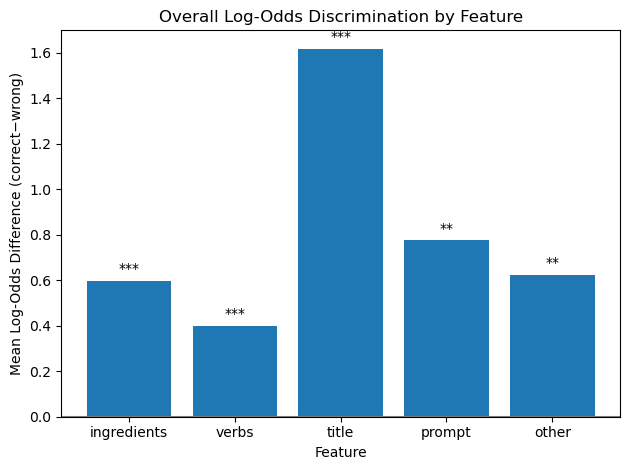

In [32]:
features = [
    'avg_ingredients_logodd',
    'avg_verbs_logodd',
    'avg_title_logodd',
    'avg_prompt_logodd',
    'avg_other_logodd'
]

# flag correct vs wrong
df = df_llm_human.copy()
df['correct'] = df['naed_label'] == df['human_label']

# collect stats
rows = []
for feat in features:
    corr = df[df['correct']][feat].dropna()
    wrong = df[~df['correct']][feat].dropna()
    tstat, pval = ttest_ind(corr, wrong, equal_var=False)
    rows.append({
        'feature': feat.replace('avg_','').replace('_logodd',''),
        'mean_correct': corr.mean(),
        'mean_wrong':   wrong.mean(),
        'diff':         corr.mean() - wrong.mean(),
        't_stat':       tstat,
        'p_val':        pval
    })

summary = pd.DataFrame(rows)
summary['p_adj'] = multipletests(summary['p_val'], method='fdr_bh')[1]

print(summary)

# bar‐plot of the mean differences
fig, ax = plt.subplots()
ax.bar(summary['feature'], summary['diff'])
ax.axhline(0, color='gray')
for i, r in summary.iterrows():
    sig = ''
    if   r['p_adj'] < 0.001: sig='***'
    elif r['p_adj'] < 0.01:  sig='**'
    elif r['p_adj'] < 0.05:  sig='*'
    ax.text(i, r['diff'] + np.sign(r['diff'])*0.02, sig,
            ha='center', va='bottom' if r['diff']>=0 else 'top')
ax.set_ylabel('Mean Log-Odds Difference (correct−wrong)')
ax.set_xlabel('Feature')
ax.set_title('Overall Log-Odds Discrimination by Feature')
plt.tight_layout()
plt.show()


# Variance/Mean Analysis

## Bert

In [33]:
metrics = ['avg_ing_logodds', 'avg_verb_logodds',
       'avg_title_logodds']

results = []
for k in df_bert_human['human_labelling'].unique():
    sub     = df_bert_human[df_bert_human['human_labelling'] == k]
    correct = sub[sub['hier'] == k]
    wrong   = sub[sub['hier'] != k]
    for m in metrics:
        tstat, p_mean = ttest_ind(
            correct[m],
            wrong[m],
            equal_var=False,
            nan_policy='omit'
        )
        mean_diff = correct[m].mean() - wrong[m].mean()

        wstat, p_var = levene(
            correct[m],
            wrong[m],
            center='median',  
            nan_policy='omit'
        )
        var_diff = correct[m].var(ddof=1) - wrong[m].var(ddof=1)

        results.append({
            'cluster'    : k,
            'metric'     : m,
            'mean_corr'  : correct[m].mean(),
            'mean_wrong' : wrong[m].mean(),
            'mean_diff'  : mean_diff,
            't_stat'     : tstat,
            'p_mean'     : p_mean,
            'var_corr'   : correct[m].var(ddof=1),
            'var_wrong'  : wrong[m].var(ddof=1),
            'var_diff'   : var_diff,
            'w_stat'     : wstat,
            'p_var'      : p_var
        })

res_df = pd.DataFrame(results)

res_df['p_mean_adj'] = multipletests(res_df['p_mean'], method='fdr_bh')[1]
res_df['p_var_adj']  = multipletests(res_df['p_var'],  method='fdr_bh')[1]

overall = []
for m in metrics:
    corr = df_bert_human[df_bert_human['hier'] == df_bert_human['human_labelling']][m]
    wrong= df_bert_human[df_bert_human['hier'] != df_bert_human['human_labelling']][m]

    # mean
    t, p_m = ttest_ind(corr, wrong, equal_var=False, nan_policy='omit')
    # variance
    w, p_v = levene(corr, wrong, center='median', nan_policy='omit')

    overall.append({
        'cluster'    : 'ALL',
        'metric'     : m,
        'mean_corr'  : corr.mean(),
        'mean_wrong' : wrong.mean(),
        'mean_diff'  : corr.mean() - wrong.mean(),
        't_stat'     : t,
        'p_mean'     : p_m,
        'var_corr'   : corr.var(ddof=1),
        'var_wrong'  : wrong.var(ddof=1),
        'var_diff'   : corr.var(ddof=1) - wrong.var(ddof=1),
        'w_stat'     : w,
        'p_var'      : p_v
    })
overall_df = pd.DataFrame(overall)
overall_df['p_mean_adj'] = multipletests(overall_df['p_mean'], method='fdr_bh')[1]
overall_df['p_var_adj']  = multipletests(overall_df['p_var'],  method='fdr_bh')[1]

final = pd.concat([res_df, overall_df], ignore_index=True)
final.to_csv('cluster_vs_human_logodds_variance_tests.csv', index=False)
print(final)

   cluster             metric  mean_corr  mean_wrong  mean_diff    t_stat  \
0        2    avg_ing_logodds   0.017669    0.036859  -0.019190 -5.206101   
1        2   avg_verb_logodds   0.006557    0.016356  -0.009799 -2.943670   
2        2  avg_title_logodds   2.664310    2.545503   0.118808  0.344290   
3        7    avg_ing_logodds   0.004387    0.005510  -0.001123 -0.399729   
4        7   avg_verb_logodds   0.004855    0.008445  -0.003590 -1.194478   
5        7  avg_title_logodds   2.027133    2.301531  -0.274398 -0.580814   
6        6    avg_ing_logodds   0.008051   -0.006322   0.014373  2.500988   
7        6   avg_verb_logodds   0.015131    0.005889   0.009243  1.949169   
8        6  avg_title_logodds   1.935614    2.031418  -0.095804 -0.109811   
9        5    avg_ing_logodds   0.015936   -0.000052   0.015988  4.406321   
10       5   avg_verb_logodds   0.004089    0.006245  -0.002156 -0.824690   
11       5  avg_title_logodds   1.887118    2.055151  -0.168033 -0.507597   

In [34]:
alpha = 0.05
sig = final[
    (final['p_mean_adj'] < alpha) |
    (final['p_var_adj']  < alpha)
]

print(
    sig[[
        'cluster','metric',
        'mean_diff','t_stat','p_mean_adj',
        'var_diff','w_stat','p_var_adj'
    ]]
    .sort_values(['cluster','metric'])
)

   cluster             metric  mean_diff    t_stat  p_mean_adj  var_diff  \
12       1    avg_ing_logodds   0.023231  3.299511    0.010040  0.000910   
13       1   avg_verb_logodds   0.009003  1.844135    0.170422  0.000667   
0        2    avg_ing_logodds  -0.019190 -5.206101    0.000009 -0.000814   
1        2   avg_verb_logodds  -0.009799 -2.943670    0.018614 -0.000511   
15       4    avg_ing_logodds  -0.004101 -1.103975    0.438506 -0.000946   
16       4   avg_verb_logodds   0.004758  1.304939    0.408708  0.000474   
9        5    avg_ing_logodds   0.015988  4.406321    0.000196  0.000091   
10       5   avg_verb_logodds  -0.002156 -0.824690    0.617352 -0.000356   
7        6   avg_verb_logodds   0.009243  1.949169    0.170422  0.000313   
4        7   avg_verb_logodds  -0.003590 -1.194478    0.411347 -0.000263   
21     ALL    avg_ing_logodds  -0.001346 -0.716494    0.710807 -0.000495   
23     ALL  avg_title_logodds   0.044303  0.275251    0.783183 -2.047387   
22     ALL  

## LLM

In [35]:
metrics = ['avg_ingredients_logodd',
       'avg_verbs_logodd', 'avg_title_logodd', 'avg_prompt_logodd',
       'avg_other_logodd']

results = []
for k in df_llm_human['human_labelling'].unique():
    sub     = df_llm_human[df_llm_human['human_labelling'] == k]
    correct = sub[sub['hier'] == k]
    wrong   = sub[sub['hier'] != k]
    for m in metrics:
        tstat, p_mean = ttest_ind(
            correct[m],
            wrong[m],
            equal_var=False,
            nan_policy='omit'
        )
        mean_diff = correct[m].mean() - wrong[m].mean()

        wstat, p_var = levene(
            correct[m],
            wrong[m],
            center='median',  
            nan_policy='omit'
        )
        var_diff = correct[m].var(ddof=1) - wrong[m].var(ddof=1)

        results.append({
            'cluster'    : k,
            'metric'     : m,
            'mean_corr'  : correct[m].mean(),
            'mean_wrong' : wrong[m].mean(),
            'mean_diff'  : mean_diff,
            't_stat'     : tstat,
            'p_mean'     : p_mean,
            'var_corr'   : correct[m].var(ddof=1),
            'var_wrong'  : wrong[m].var(ddof=1),
            'var_diff'   : var_diff,
            'w_stat'     : wstat,
            'p_var'      : p_var
        })

res_df = pd.DataFrame(results)

res_df['p_mean_adj'] = multipletests(res_df['p_mean'], method='fdr_bh')[1]
res_df['p_var_adj']  = multipletests(res_df['p_var'],  method='fdr_bh')[1]

overall = []
for m in metrics:
    corr = df_llm_human[df_llm_human['hier'] == df_llm_human['human_labelling']][m]
    wrong= df_llm_human[df_llm_human['hier'] != df_llm_human['human_labelling']][m]

    # mean
    t, p_m = ttest_ind(corr, wrong, equal_var=False, nan_policy='omit')
    # variance
    w, p_v = levene(corr, wrong, center='median', nan_policy='omit')

    overall.append({
        'cluster'    : 'ALL',
        'metric'     : m,
        'mean_corr'  : corr.mean(),
        'mean_wrong' : wrong.mean(),
        'mean_diff'  : corr.mean() - wrong.mean(),
        't_stat'     : t,
        'p_mean'     : p_m,
        'var_corr'   : corr.var(ddof=1),
        'var_wrong'  : wrong.var(ddof=1),
        'var_diff'   : corr.var(ddof=1) - wrong.var(ddof=1),
        'w_stat'     : w,
        'p_var'      : p_v
    })
overall_df = pd.DataFrame(overall)
overall_df['p_mean_adj'] = multipletests(overall_df['p_mean'], method='fdr_bh')[1]
overall_df['p_var_adj']  = multipletests(overall_df['p_var'],  method='fdr_bh')[1]

final = pd.concat([res_df, overall_df], ignore_index=True)
final.to_csv('cluster_vs_human_logodds_variance_tests.csv', index=False)
print(final)

   cluster                  metric  mean_corr  mean_wrong  mean_diff  \
0        2  avg_ingredients_logodd   1.268799    1.251037   0.017763   
1        2        avg_verbs_logodd   0.697285    0.349552   0.347733   
2        2        avg_title_logodd   2.725395    2.237050   0.488345   
3        2       avg_prompt_logodd   3.033295    2.851522   0.181773   
4        2        avg_other_logodd   3.172969    2.561515   0.611454   
5        7  avg_ingredients_logodd   1.159201    1.220810  -0.061609   
6        7        avg_verbs_logodd   0.510748    0.181229   0.329519   
7        7        avg_title_logodd   2.018720    1.496780   0.521940   
8        7       avg_prompt_logodd   3.511251    3.372861   0.138390   
9        7        avg_other_logodd   1.763003    2.107379  -0.344376   
10       6  avg_ingredients_logodd   0.706916    0.455550   0.251366   
11       6        avg_verbs_logodd   1.248170    0.516391   0.731779   
12       6        avg_title_logodd   3.142892    2.435939   0.70

## Plots

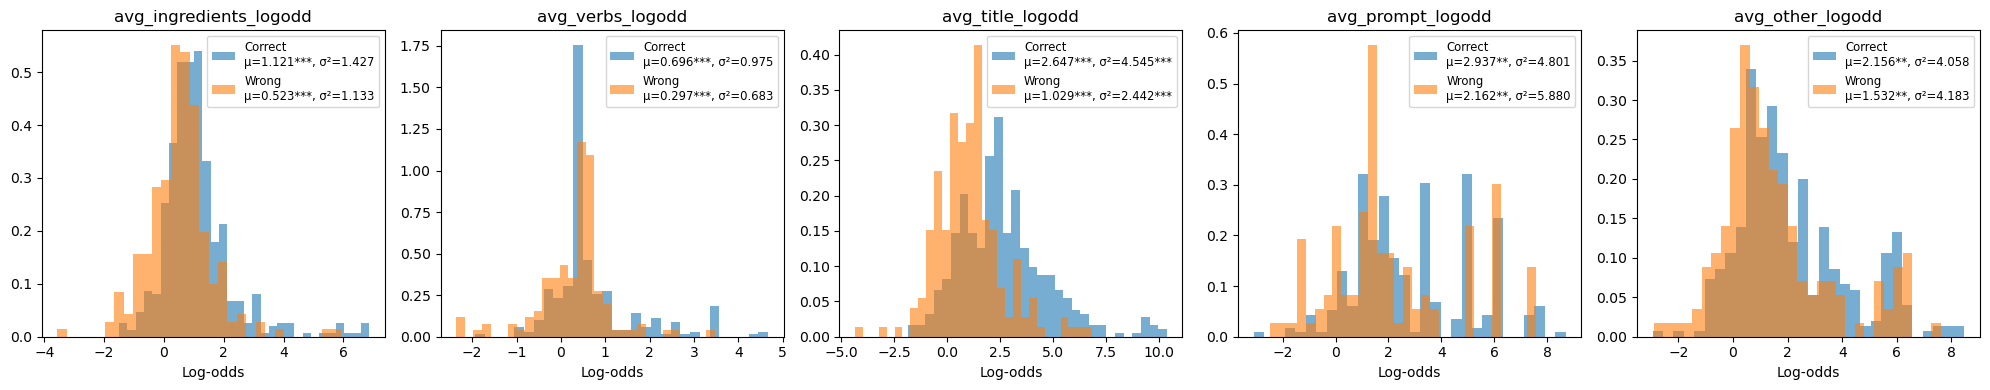

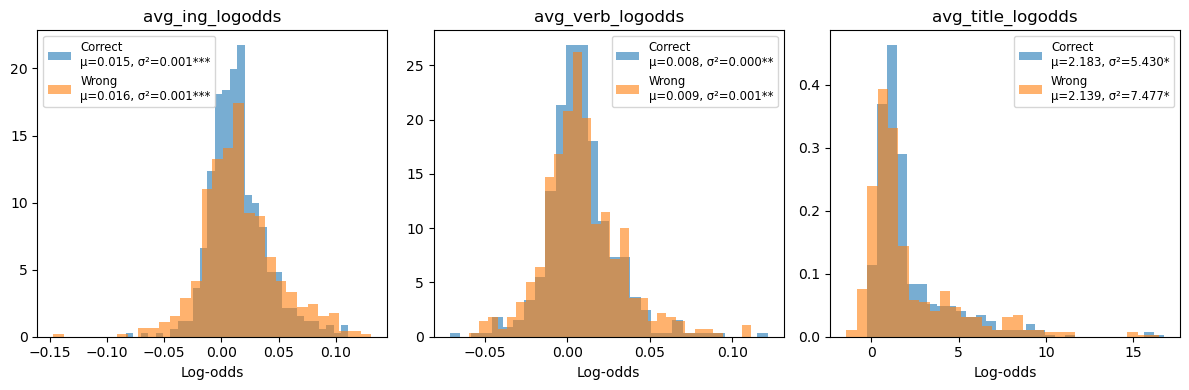

In [46]:
# os.makedirs('images', exist_ok=True)

def plot_histograms_with_wrapping(df, metrics, correct_mask,
                                  mean_padj_map, var_padj_map,
                                  n_cols=3, bins=30,
                                  savepath=None):
    n = len(metrics)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=False)
    axes = axes.flatten()

    for i, m in enumerate(metrics):
        ax = axes[i]
        corr  = df.loc[correct_mask, m].dropna().values
        wrong = df.loc[~correct_mask, m].dropna().values

        μ_c, σ2_c = corr.mean(), corr.var(ddof=1)
        μ_w, σ2_w = wrong.mean(), wrong.var(ddof=1)
        star_m = significance_star(mean_padj_map[m])
        star_v = significance_star(var_padj_map[m])

        label_c = f"Correct\nμ={μ_c:.3f}{star_m}, σ²={σ2_c:.3f}{star_v}"
        label_w = f"Wrong\nμ={μ_w:.3f}{star_m}, σ²={σ2_w:.3f}{star_v}"

        ax.hist(corr,  bins=bins, alpha=0.6, density=True, label=label_c)
        ax.hist(wrong, bins=bins, alpha=0.6, density=True, label=label_w)
        ax.set_title(m)
        ax.set_xlabel('Log-odds')
        ax.legend(fontsize='small')

    # remove empty axes
    for j in range(n, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()

    # save if requested
    if savepath:
        fig.savefig(savepath, dpi=300)
    plt.show()


# LLM histograms
plot_histograms_with_wrapping(
    df_llm_human,
    llm_metrics,
    llm_correct,
    llm_mean_padj,
    llm_var_padj,
    n_cols=5,
    bins=30,
    savepath='../images/llm_histograms.png'
)

# BERT histograms
plot_histograms_with_wrapping(
    df_bert_human,
    bert_metrics,
    bert_correct,
    bert_mean_padj,
    bert_var_padj,
    n_cols=3,
    bins=30,
    savepath='../images/bert_histograms.png'
)



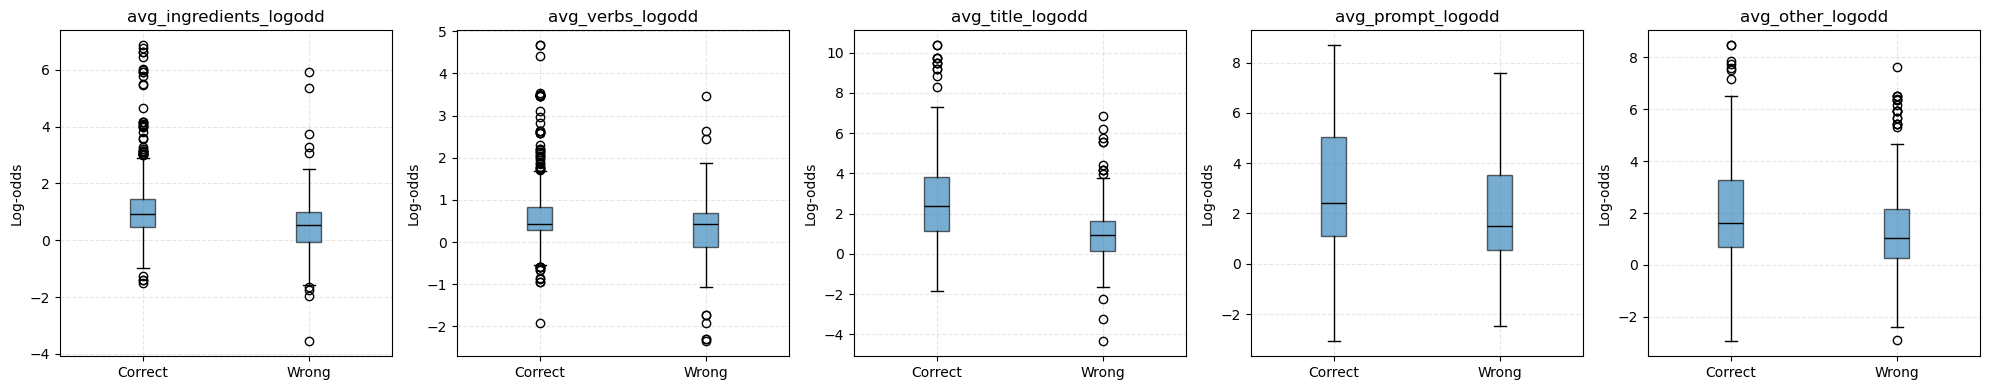

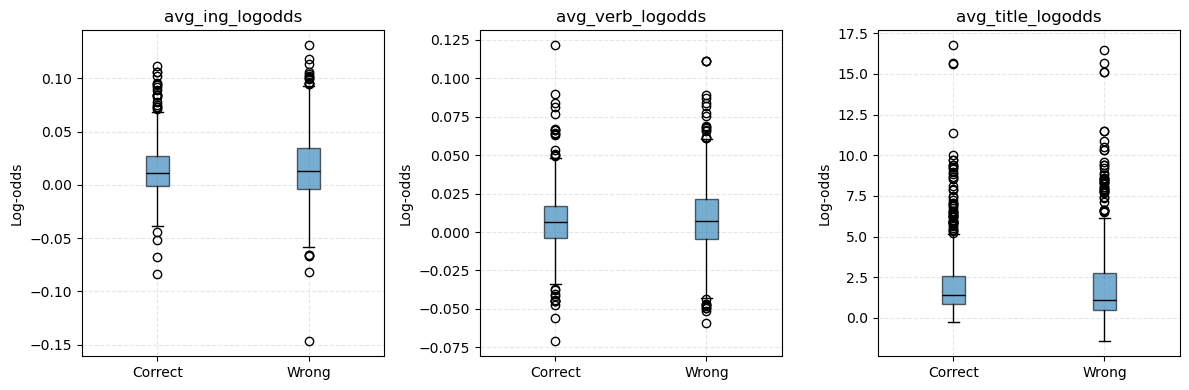

In [47]:
def plot_boxplots_with_wrapping(df, metrics, correct_mask,
                                savepath=None, n_cols=3):
    n = len(metrics)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=False)
    axes = axes.flatten()

    for i, m in enumerate(metrics):
        ax = axes[i]
        # Prepare data
        corr  = df.loc[correct_mask, m].dropna().values
        wrong = df.loc[~correct_mask, m].dropna().values

        # Boxplot: two boxes, one for correct, one for wrong
        ax.boxplot([corr, wrong],
                   labels=['Correct', 'Wrong'],
                   patch_artist=True,
                   boxprops=dict(facecolor='C0', alpha=0.6),
                   medianprops=dict(color='black'))
        ax.set_title(m)
        ax.set_ylabel('Log-odds')
        ax.grid(True, linestyle='--', alpha=0.3)

    # remove any empty axes
    for j in range(n, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()

    # Save if needed
    if savepath:
        fig.savefig(savepath, dpi=300)
    plt.show()


# LLM boxplots
plot_boxplots_with_wrapping(
    df_llm_human,
    llm_metrics,
    llm_correct,
    savepath='../images/llm_boxplots.png',
    n_cols=5
)

# BERT boxplots
plot_boxplots_with_wrapping(
    df_bert_human,
    bert_metrics,
    bert_correct,
    savepath='../images/bert_boxplots.png',
    n_cols=3
)


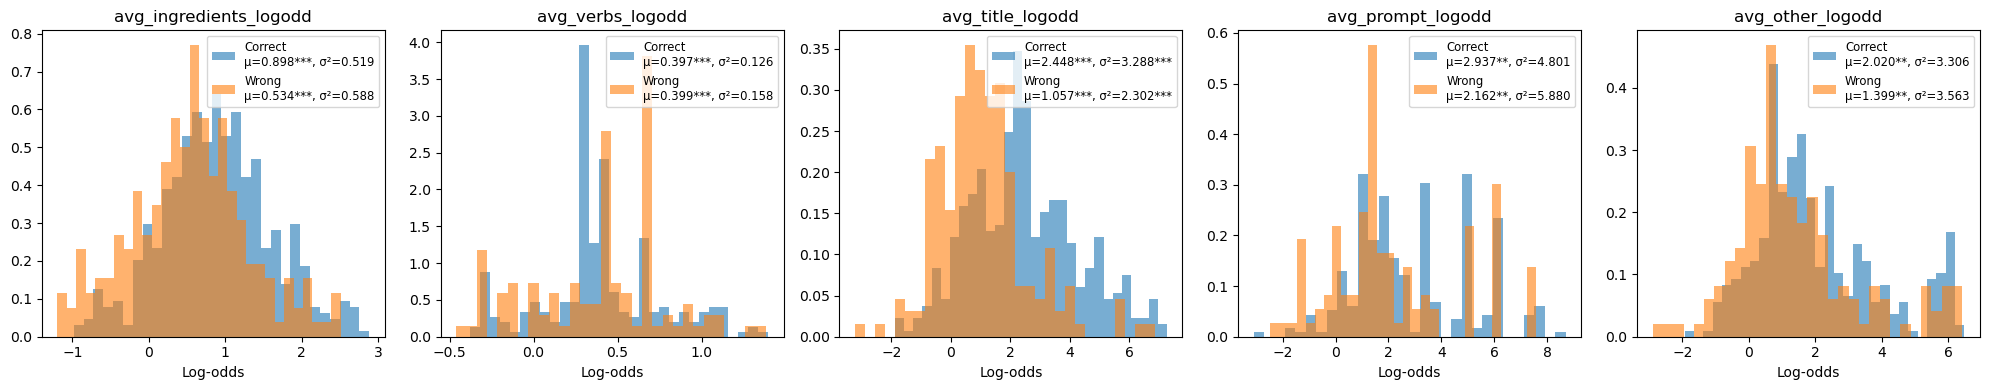

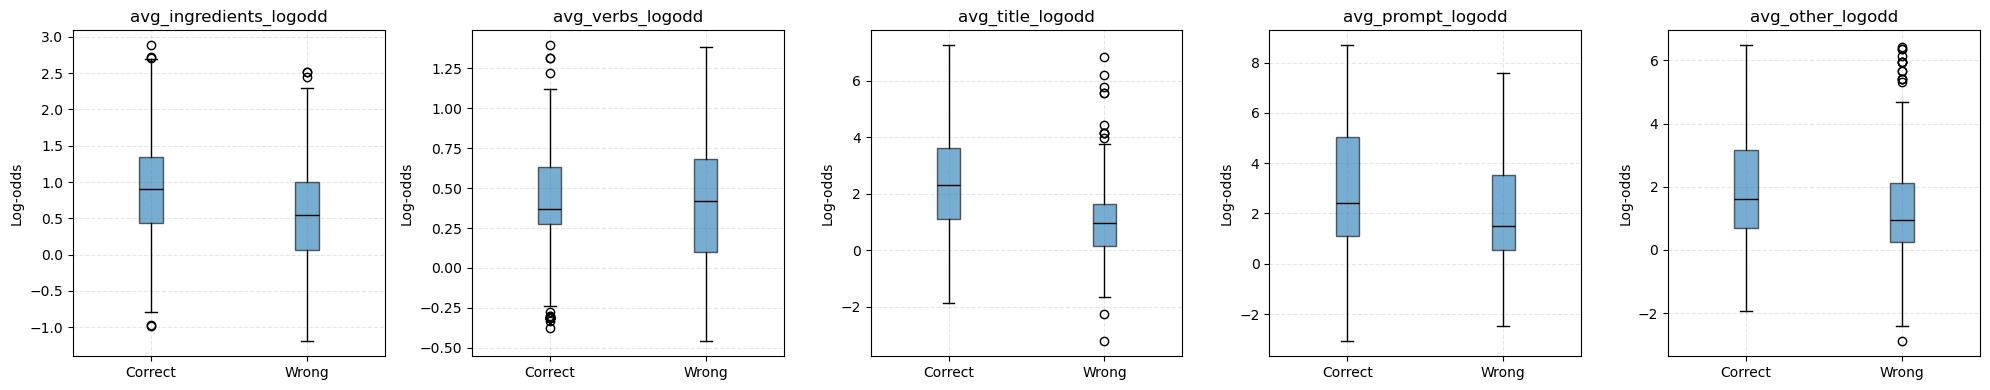

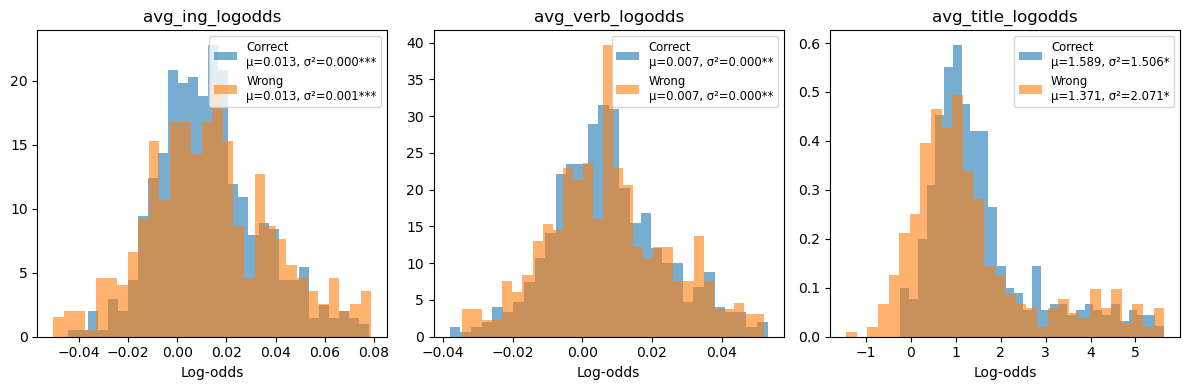

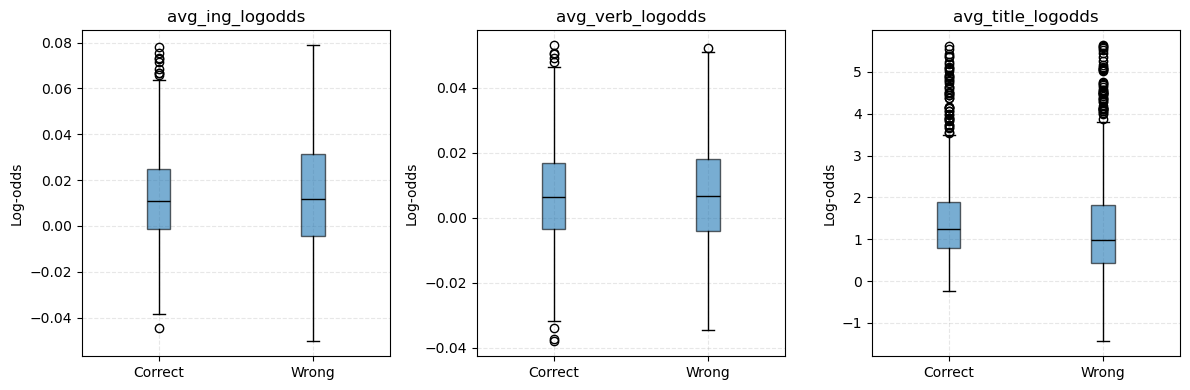

In [50]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

# ensure output folder exists
# os.makedirs('images', exist_ok=True)

def plot_histograms_IQR(df, metrics, correct_mask,
                        mean_padj_map, var_padj_map,
                        n_cols=3, bins=30, savepath=None):
    n = len(metrics)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=False)
    axes = axes.flatten()

    for i, m in enumerate(metrics):
        ax = axes[i]
        corr  = df.loc[correct_mask, m].dropna().values
        wrong = df.loc[~correct_mask, m].dropna().values

        # compute Q1, Q3 on combined
        combined = np.concatenate([corr, wrong])
        q1, q3 = np.percentile(combined, [25, 75])
        iqr = q3 - q1
        lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr

        # filter
        corr_f = corr[(corr >= lo) & (corr <= hi)]
        wrong_f = wrong[(wrong >= lo) & (wrong <= hi)]

        # stats for labels
        μ_c, σ2_c = corr_f.mean(), corr_f.var(ddof=1)
        μ_w, σ2_w = wrong_f.mean(), wrong_f.var(ddof=1)
        star_m = significance_star(mean_padj_map[m])
        star_v = significance_star(var_padj_map[m])

        label_c = f"Correct\nμ={μ_c:.3f}{star_m}, σ²={σ2_c:.3f}{star_v}"
        label_w = f"Wrong\nμ={μ_w:.3f}{star_m}, σ²={σ2_w:.3f}{star_v}"

        ax.hist(corr_f, bins=bins, alpha=0.6, density=True, label=label_c)
        ax.hist(wrong_f, bins=bins, alpha=0.6, density=True, label=label_w)
        ax.set_title(m)
        ax.set_xlabel('Log-odds')
        ax.legend(fontsize='small')

    for j in range(n, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, dpi=300)
    plt.show()


def plot_boxplots_IQR(df, metrics, correct_mask,
                     savepath=None, n_cols=3):
    n = len(metrics)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=False)
    axes = axes.flatten()

    for i, m in enumerate(metrics):
        ax = axes[i]
        corr  = df.loc[correct_mask, m].dropna().values
        wrong = df.loc[~correct_mask, m].dropna().values

        # compute IQR bounds
        combined = np.concatenate([corr, wrong])
        q1, q3 = np.percentile(combined, [25, 75])
        iqr = q3 - q1
        lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr

        # filter
        corr_f = corr[(corr >= lo) & (corr <= hi)]
        wrong_f = wrong[(wrong >= lo) & (wrong <= hi)]

        # boxplot
        ax.boxplot(
            [corr_f, wrong_f],
            labels=['Correct', 'Wrong'],
            patch_artist=True,
            boxprops=dict(facecolor='C0', alpha=0.6),
            medianprops=dict(color='black')
        )
        ax.set_title(m)
        ax.set_ylabel('Log-odds')
        ax.grid(True, linestyle='--', alpha=0.3)

    for j in range(n, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, dpi=300)
    plt.show()


# Re-plot for LLM
plot_histograms_IQR(
    df_llm_human, llm_metrics, llm_correct,
    llm_mean_padj, llm_var_padj,
    n_cols=5, bins=30,
    savepath='../images/llm_histograms_IQR.png'
)
plot_boxplots_IQR(
    df_llm_human, llm_metrics, llm_correct,
    savepath='../images/llm_boxplots_IQR.png',
    n_cols=5
)

# Re-plot for BERT
plot_histograms_IQR(
    df_bert_human, bert_metrics, bert_correct,
    bert_mean_padj, bert_var_padj,
    n_cols=3, bins=30,
    savepath='../images/bert_histograms_IQR.png'
)
plot_boxplots_IQR(
    df_bert_human, bert_metrics, bert_correct,
    savepath='../images/bert_boxplots_IQR.png',
    n_cols=3
)


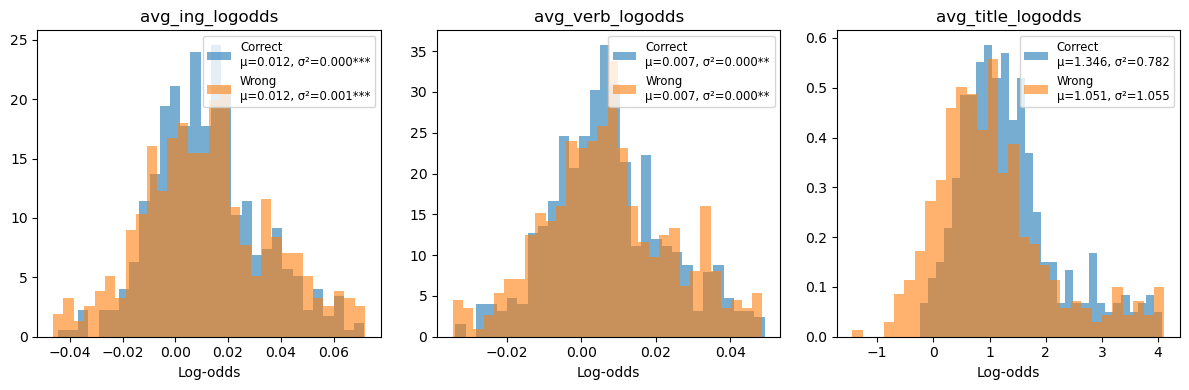

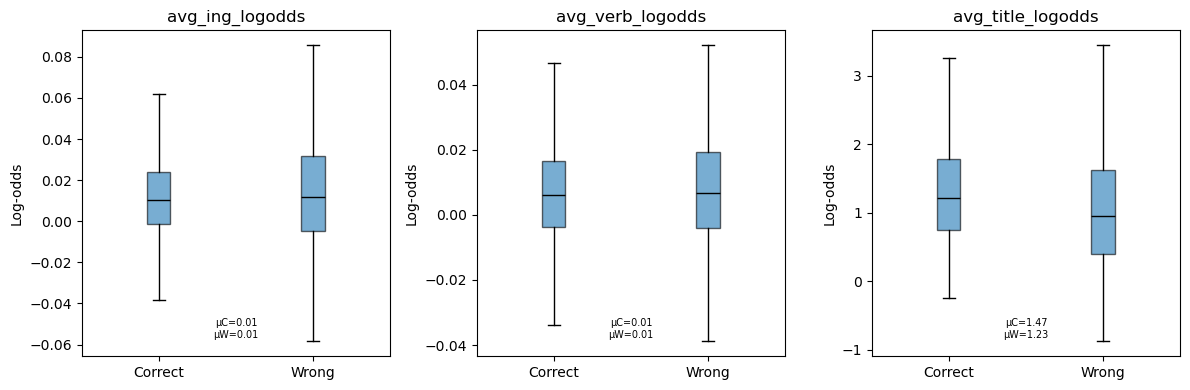

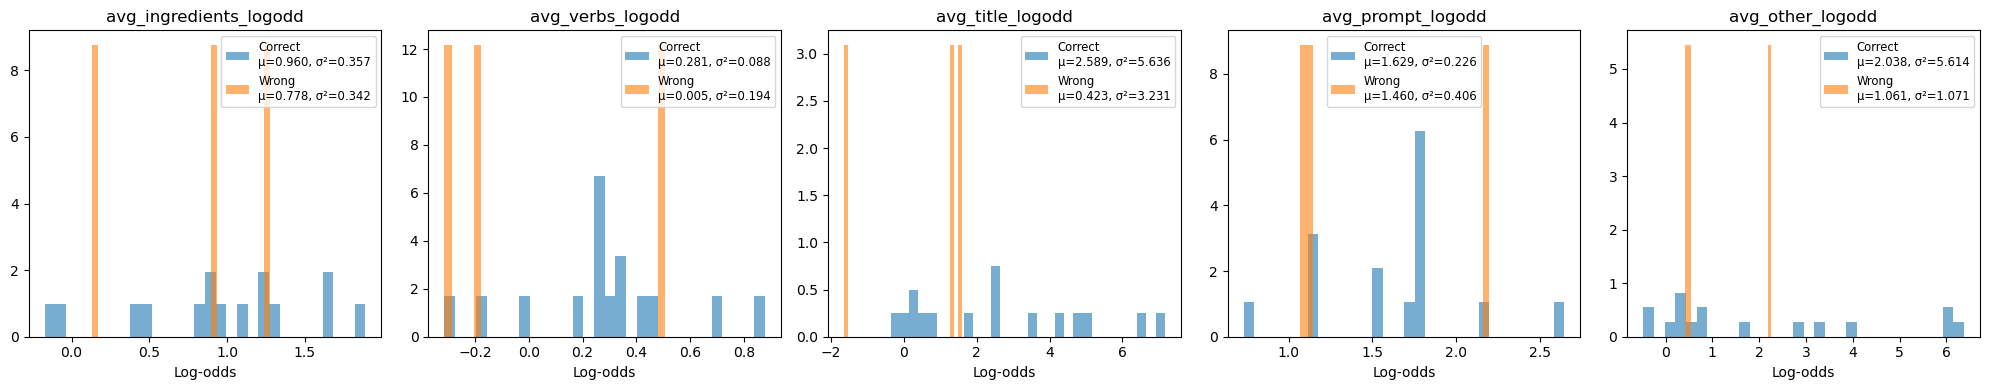

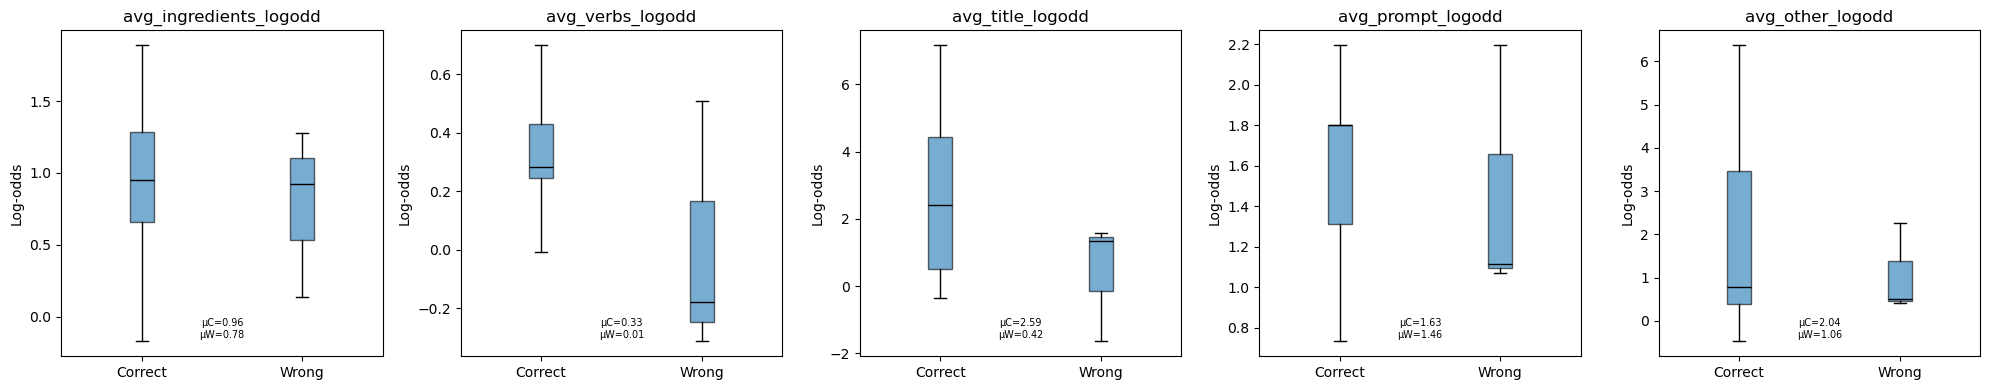

In [56]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

# ensure output folder exists
# os.makedirs('images', exist_ok=True)

def plot_histograms_loose(df, metrics, correct_mask,
                          mean_padj_map, var_padj_map,
                          n_cols=3, bins=30, savepath=None):
    n = len(metrics)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=False)
    axes = axes.flatten()

    for i, m in enumerate(metrics):
        # compute loose 2×IQR bounds on combined
        values = df[m].dropna()
        k = 1.5
        q1, q3 = np.percentile(values, [25, 75])
        iqr = q3 - q1
        lo, hi = q1 - k*iqr, q3 + k*iqr

        # filter before splitting
        df_metric = df[df[m].between(lo, hi)]

        ax = axes[i]
        corr_s  = df_metric.loc[correct_mask, m].dropna().values
        wrong_s = df_metric.loc[~correct_mask, m].dropna().values

        μ_c, σ2_c = corr_s.mean(), corr_s.var(ddof=1)
        μ_w, σ2_w = wrong_s.mean(), wrong_s.var(ddof=1)
        star_m = significance_star(mean_padj_map[m])
        star_v = significance_star(var_padj_map[m])

        label_c = f"Correct\nμ={μ_c:.3f}{star_m}, σ²={σ2_c:.3f}{star_v}"
        label_w = f"Wrong\nμ={μ_w:.3f}{star_m}, σ²={σ2_w:.3f}{star_v}"

        ax.hist(corr_s, bins=bins, alpha=0.6, density=True, label=label_c)
        ax.hist(wrong_s, bins=bins, alpha=0.6, density=True, label=label_w)
        ax.set_title(m)
        ax.set_xlabel('Log-odds')
        ax.legend(fontsize='small')

    for j in range(n, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, dpi=300)
    plt.show()


def plot_boxplots_loose(df, metrics, correct_mask,
                        mean_padj_map, var_padj_map,
                        n_cols=3, savepath=None):
    n = len(metrics)
    n_rows = math.ceil(n / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), sharey=False)
    axes = axes.flatten()

    for i, m in enumerate(metrics):
        # compute loose 2×IQR bounds on combined
        values = df[m].dropna()
        q1, q3 = np.percentile(values, [25, 75])
        iqr = q3 - q1
        lo, hi = q1 - 2*iqr, q3 + 2*iqr

        # filter before splitting
        df_metric = df[df[m].between(lo, hi)]

        ax = axes[i]
        corr_s  = df_metric.loc[correct_mask, m].dropna().values
        wrong_s = df_metric.loc[~correct_mask, m].dropna().values

        μ_c, σ2_c = corr_s.mean(), corr_s.var(ddof=1)
        μ_w, σ2_w = wrong_s.mean(), wrong_s.var(ddof=1)
        star_m = significance_star(mean_padj_map[m])
        star_v = significance_star(var_padj_map[m])

        ax.boxplot(
            [corr_s, wrong_s],
            labels=['Correct', 'Wrong'],
            showfliers=False,
            patch_artist=True,
            boxprops=dict(facecolor='C0', alpha=0.6),
            medianprops=dict(color='black')
        )
        ax.set_title(m)
        ax.set_ylabel('Log-odds')
        ax.text(
            0.5, 0.05,
            f"μC={μ_c:.2f}{star_m}\nμW={μ_w:.2f}{star_m}",
            transform=ax.transAxes, ha='center', va='bottom', fontsize='x-small'
        )

    for j in range(n, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    if savepath:
        fig.savefig(savepath, dpi=300)
    plt.show()


# Example calls (update save paths as needed)
plot_histograms_loose(
    bert_df_clean, bert_metrics, bert_correct_mask,
    bert_mean_padj, bert_var_padj,
    n_cols=3, bins=30,
    savepath='../images/bert_histograms_loose_2iqr.png'
)
plot_boxplots_loose(
    bert_df_clean, bert_metrics, bert_correct_mask,
    bert_mean_padj, bert_var_padj,
    n_cols=3,
    savepath='../images/bert_boxplots_loose_2iqr.png'
)

plot_histograms_loose(
    llm_df_clean, llm_metrics, llm_correct_mask,
    llm_mean_padj, llm_var_padj,
    n_cols=5, bins=30,
    savepath='../images/llm_histograms_loose_2iqr.png'
)
plot_boxplots_loose(
    llm_df_clean, llm_metrics, llm_correct_mask,
    llm_mean_padj, llm_var_padj,
    n_cols=5,
    savepath='../images/llm_boxplots_loose_2iqr.png'
)
